##  Veille régression logistique 

La régression logistique est une méthode utilisée pour **prédire une réponse binaire**, c’est-à-dire une variable qui ne peut prendre que deux valeurs (par exemple : malade ou non, 0 ou 1, oui ou non).

Elle permet de **modéliser la probabilité qu’un événement se produise** en fonction de différentes caractéristiques (âge, poids, tension, etc.).

C’est un outil très utilisé en médecine pour estimer des **risques de maladies** ou de complications à partir de données patients. Elle est simple, rapide à entraîner, et offre des résultats souvent faciles à interpréter.

Dans notre cas, elle sert à prédire si un patient présente un **risque cardio-vasculaire** ou non.


In [133]:
import pandas as pd


In [134]:
df = pd.read_csv("cardio_train.csv")
print(df.shape)
df.head()


(70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Prétraitement des données

In [135]:
df = df.drop_duplicates()
print("Dimensions des donées:", df.shape)


Dimensions des donées: (70000, 13)


In [136]:

df_clean = df.copy()


initial_rows = df_clean.shape[0]

df_clean = df_clean[(df_clean["height"] >= 140) & (df_clean["height"] <= 200)]
df_clean = df_clean[(df_clean["weight"] >= 40) & (df_clean["weight"] <= 150)]


final_rows = df_clean.shape[0]


print("Dimensions après nettoyage :", df_clean.shape)
print("Le nettoyage a enlevé", initial_rows - final_rows, "lignes du jeu de données.")



Dimensions après nettoyage : (69751, 13)
Le nettoyage a enlevé 249 lignes du jeu de données.


## Visualitation des données

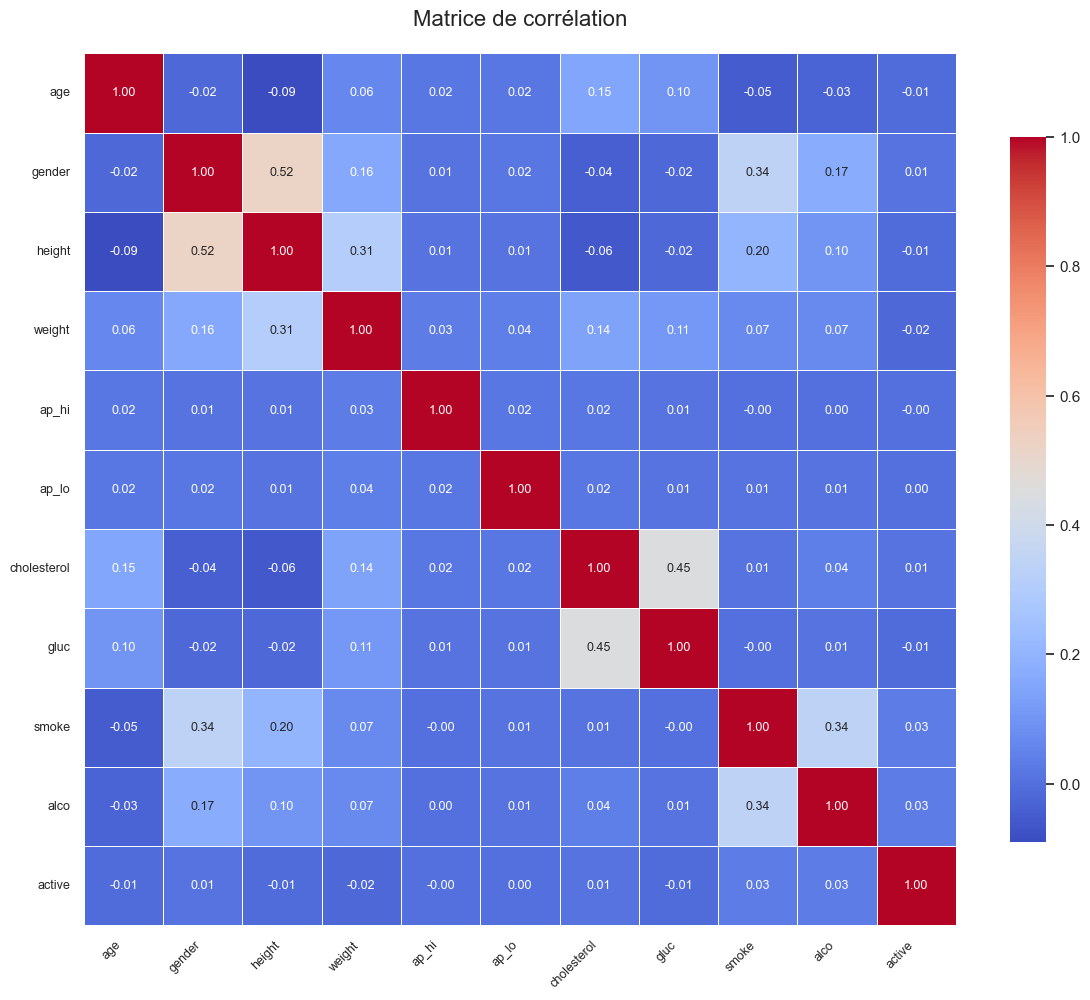

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

ordered_columns = [
    "age", "gender", "height", "weight", 
    "ap_hi", "ap_lo", "cholesterol", "gluc", 
    "smoke", "alco", "active"
]

corr_matrix = df_clean[ordered_columns].corr().round(2)

plt.figure(figsize=(12,10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 9}
)

plt.title("Matrice de corrélation", fontsize=16, pad=20)
plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()
